# STAT207 Mini-Project #2 - Grad School Admission Prediction


### Vedaant Agarwal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

## 1. Introduction

### 1.1. Primary Research Goal

The primary research goal of this project is to build a predictive model that will perform the
best when predicting the probaility of getting into a graduate school for masters for new datasets.

### 1.2. Secondary Research Goal

Ideally, we would like for our chosen model to also yield reliable interpretative insights about the nature of the relationship between the variables in the dataset.

### 1.3. Motivation

The dataset pertains to graduate school admission probabilities, geared towards Indian students. A model that predicts the admission probabilities based on various factors could be very helpful to the Indian students, as it would give them insight about which faucet of the admission process should they focus on more, and what part of their portfolio should they improve. It might also help Indian colleges in preparing their students well based on what variables are most important to improving the admission probability.

## 2. Dataset Discussion

This dataset is created for prediction of Graduate Admissions from an Indian perspective. This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset contains several parameters which are considered important during the application for Masters Programs. The dataset is owned by Mohan S Acharya. The owner requested to cite the following source:

**Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019**

The dataset was downloaded from Kaggle on 26 October 2023: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/data

In [2]:
grad = pd.read_csv('Admission_Predict_Ver1.1.csv')
grad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


The number of rows in the original dataset are:

In [3]:
grad.shape[0]

500

The parameters included are :

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )

## 3. Dataset Cleaning

The first thing to note when the data was shown above was that the `Serial No.` column is redundant with the index. This column can be removed.

In [4]:
grad = grad.drop(['Serial No.'], axis=1)
grad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Another issue that can be noted is that some of the column names include whitespaces. This could be an issue for the regression function calls which do not appreciate whitespaces, so the columns should be renamed beforehand to avoid any issues later.

In [5]:
grad = grad.rename(columns={'GRE Score':'GRE_Score', 'TOEFL Score':'TOEFL_Score',
                            'University Rating':'University_Rating',
                            'Chance of Admit ':'Chance_of_Admit',
                            'LOR ': 'LOR'})
grad.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Implicit missing values should now be checked for. All of the columns are numerical variables except `Research`, which is a binary encoded categorical variable. However, if there are no implicit missing values, all the columns should be of type `float64` or `int64`.

In [6]:
grad.dtypes

GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

There are no implicit missing values as inferred from the results shown above. All of the remaining variables will be used as predictors, so `NaN` values can now be checked for and removed.

In [7]:
grad.isna().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

There are no `NaN` values in the dataset. The final cleaned dataset is shown below.

In [8]:
grad.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
grad.shape[0]

500

As seen above, no rows were dropped from the original dataframe after cleaning.

## 4. Preliminary Analysis

### 4.1. Variable Transformation

The pairplots and the correlation matrix for the variables is shown below.

/Users/vedaant/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


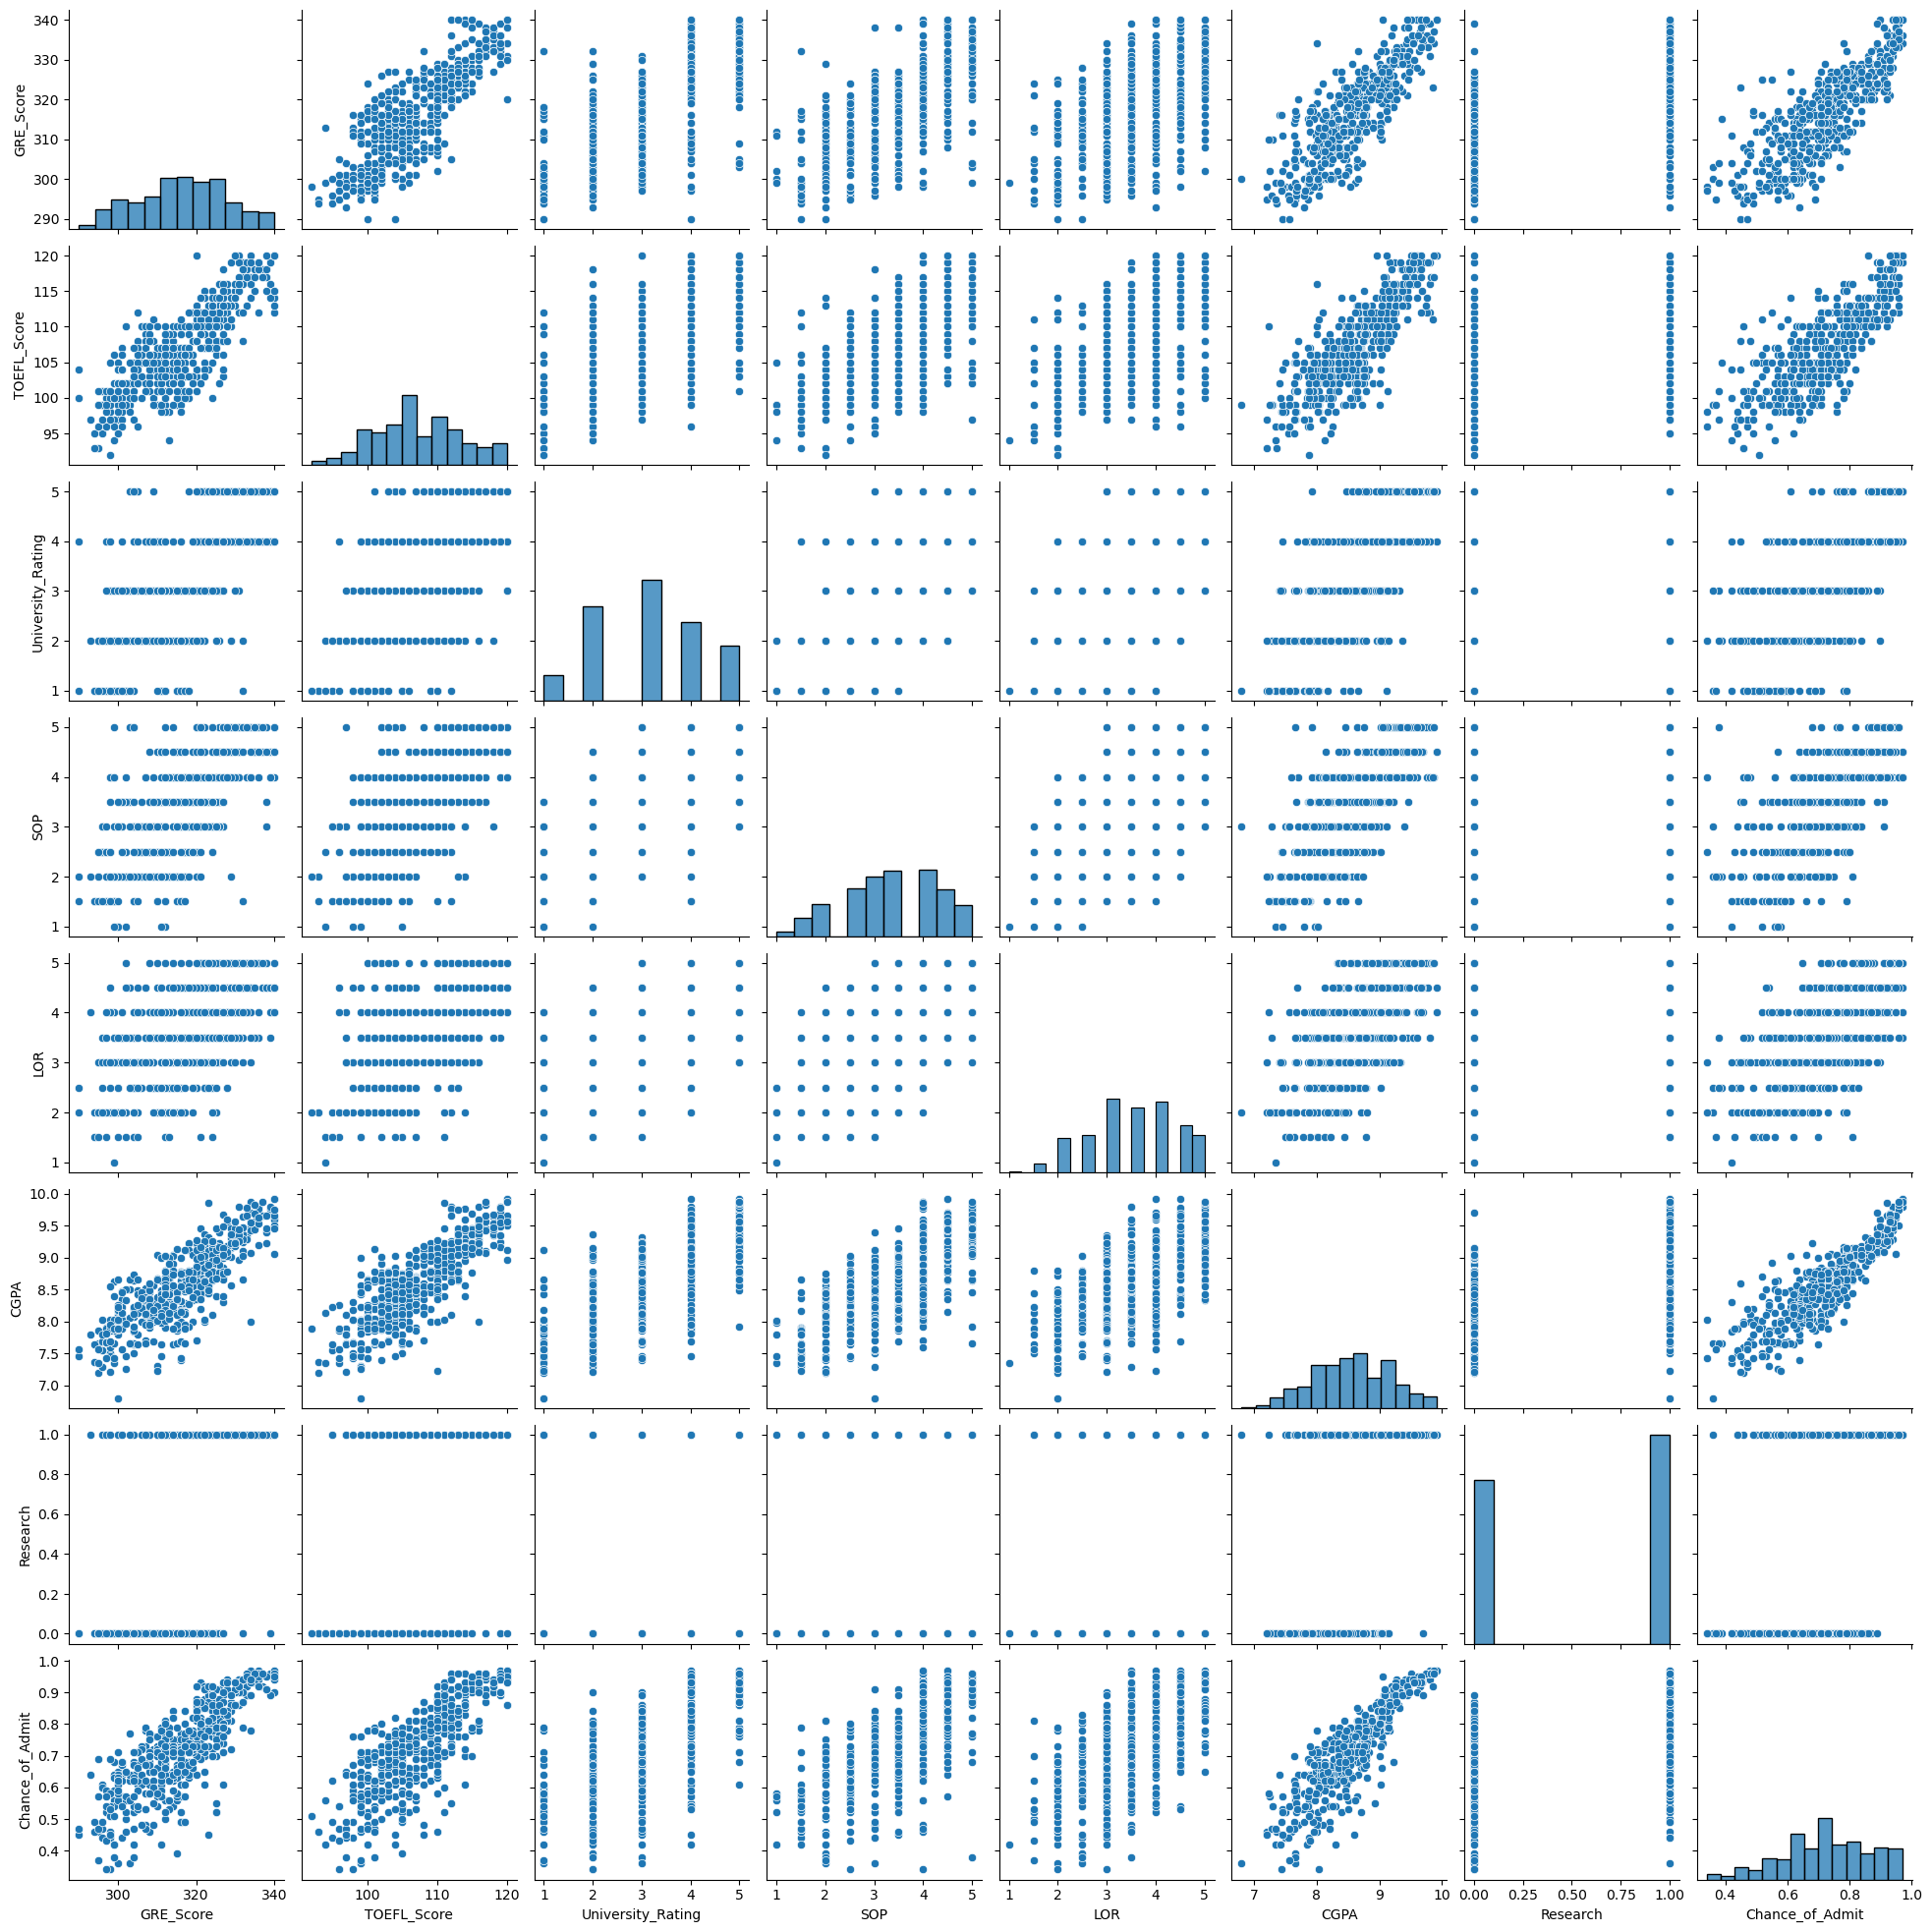

In [10]:
sns.pairplot(grad)
plt.show()

In [11]:
grad.corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


It is clear to see that a variable transformation is not required for any numerical variable because all the individual relationships look linear. 

Another observation is that there is multicollinearity if we were to fit the model using all the predictors, as noted by a high linear association between variables like `CGPA` and `GRE_Score`, `CGPA` and `TOEFL_Score`, `TOEFL_Score` and `GRE_Score`, etc. The cutoff for high linear association was chosen to be variables having a correlation coefficient with an absolute value greater than 0.7

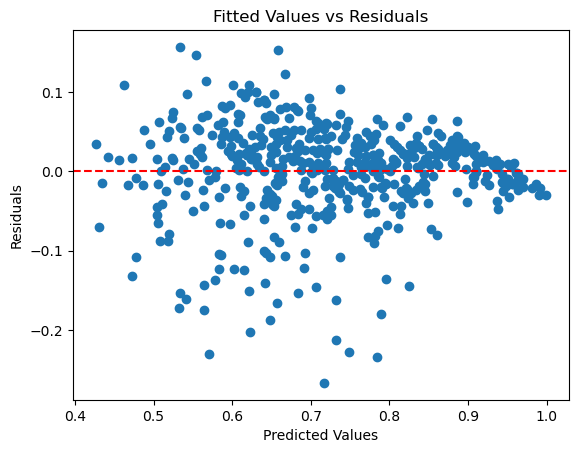

In [12]:
grad_full = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                    SOP + LOR + CGPA + Research', data=grad).fit()
plt.scatter(grad_full.fittedvalues, grad_full.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals')
plt.show()

As seen in the graph above, for small x-axis windows, moving to the right there is an even distribution of positive and negative values. Thus, it can be said that the full model meets the linearity assumption.

### 4.2. Interaction Terms

The only categorical variable in the dataset is `Research`. Note that `University_Rating`,  `SOP`, and `LOR` could technically also be considered as a type of categorical variable (ordinal variables), but because the values of these variables are hierarchical, for the sake of simplicity these three will be considered as numerical variables.

To measure the effect of `Research` on how it changes the relationship between the other predictors and our response, color-coded scatterplots can be created for every numerical predictor.

/Users/vedaant/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


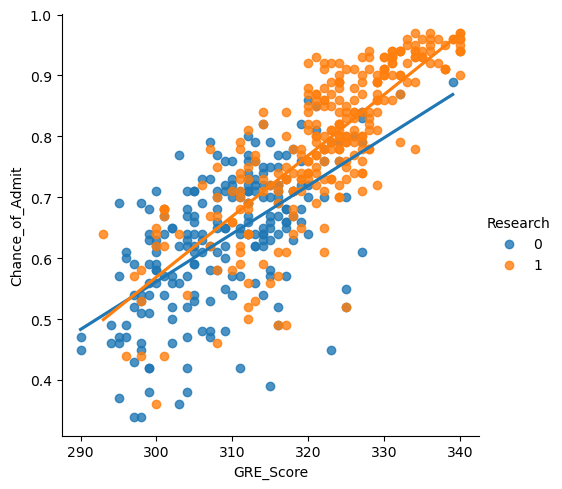

In [13]:
sns.lmplot(x='GRE_Score', y='Chance_of_Admit', hue='Research',
           ci=False, data=grad)
plt.show()

/Users/vedaant/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


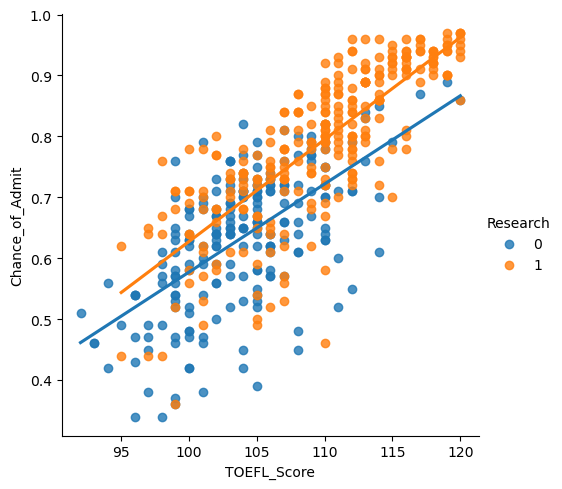

In [14]:
sns.lmplot(x='TOEFL_Score', y='Chance_of_Admit', hue='Research',
           ci=False, data=grad)
plt.show()

/Users/vedaant/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


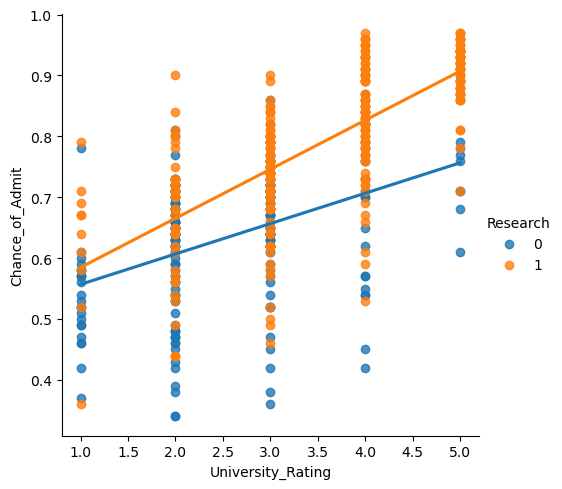

In [15]:
sns.lmplot(x='University_Rating', y='Chance_of_Admit', hue='Research',
           ci=False, data=grad)
plt.show()

/Users/vedaant/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


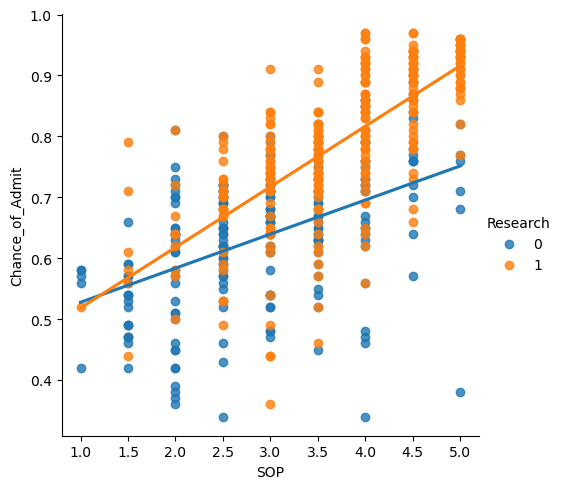

In [16]:
sns.lmplot(x='SOP', y='Chance_of_Admit', hue='Research',
           ci=False, data=grad)
plt.show()

/Users/vedaant/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


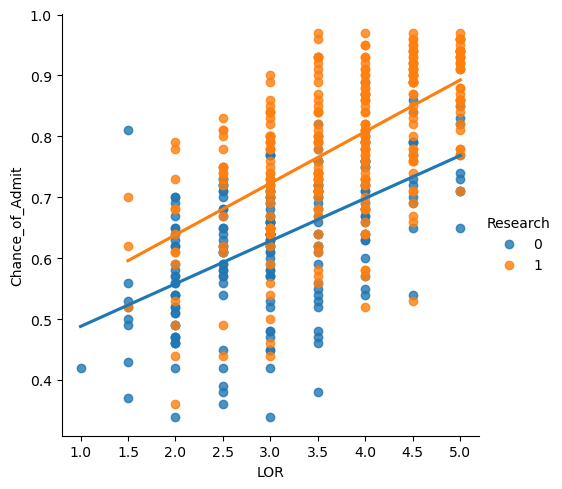

In [17]:
sns.lmplot(x='LOR', y='Chance_of_Admit', hue='Research',
           ci=False, data=grad)
plt.show()

/Users/vedaant/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


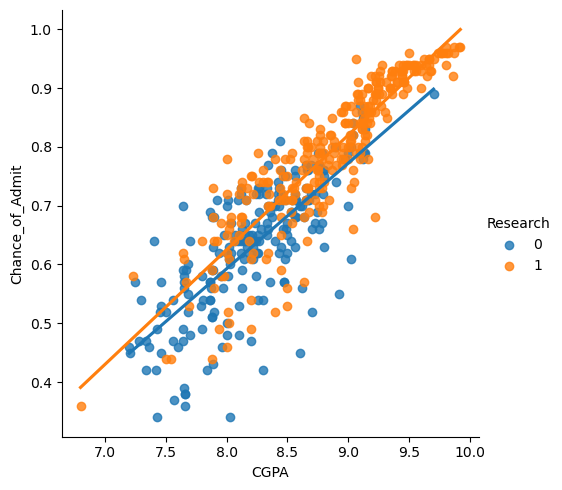

In [18]:
sns.lmplot(x='CGPA', y='Chance_of_Admit', hue='Research',
           ci=False, data=grad)
plt.show()

There seems to be a moderate interaction between `Research` and `GRE_Score`, `University_Rating` and `SOP` in how they impact `Chance_of_Admit`, as seen by the different slopes for those respective graphs. For the other variables, the two slopes are practically identical (just y-shifted), indicating little to no interaction. 

## 5. Predictive Models

Using a random state of 100, and a test dataset size of 20% of the total dataset, the training and test datasets were created.

In [19]:
grad_train, grad_test = train_test_split(grad, test_size=0.2, random_state=100)

The training and test dataset were z-score scaled. This was done to increase the interpretability of the slopes of the final model, as z-score scaling rescales the data such that each numerical predictor has the same mean and standard deviation. First, the features matrix has to be defined.

In [20]:
X_train = grad_train.drop(['Chance_of_Admit'], axis = 1).reset_index(drop=True)
Y_train = grad_train['Chance_of_Admit'].reset_index(drop=True)

X_test = grad_test.drop(['Chance_of_Admit'], axis = 1).reset_index(drop=True)
Y_test = grad_test['Chance_of_Admit'].reset_index(drop=True)

Only the numerical variables should be z-score scaled, so the `Research` column should be removed before scaling.

In [21]:
num_train = X_train.drop(['Research'], axis = 1)
num_test = X_test.drop(['Research'], axis = 1)

Finally, the numerical predictors were z-score scaled.

In [30]:
scaler_train = StandardScaler()

scaled_train_num = scaler_train.fit_transform(num_train)
num_scaled_train = pd.DataFrame(scaled_train_num, columns=num_train.columns)
num_scaled_train.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA
0,-1.852749,-1.315784,-0.949563,-0.869944,-0.505429,-1.548376
1,-0.448154,-0.986529,-0.070338,-1.384704,-1.051838,-1.565196
2,1.395378,1.812135,1.688112,1.703856,1.680209,1.512803
3,-0.974877,-0.492647,-0.949563,-0.869944,-2.144657,-1.312901
4,0.341931,-0.657275,-0.070338,-0.355184,-0.505429,-1.464278


In [31]:
scaled_test_num = scaler_train.transform(num_test)
num_scaled_test = pd.DataFrame(scaled_test_num, columns=num_test.columns)
num_scaled_test.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA
0,1.044229,1.318253,0.808887,1.189096,0.587390,0.991393
1,-0.535941,-1.315784,-0.949563,-1.899464,-1.598247,-2.137064
2,-0.448154,-0.657275,-0.070338,-1.384704,0.587390,-0.808311
3,-1.852749,-1.809666,-0.949563,-1.899464,-1.598247,-2.069786
4,0.517506,0.495117,-0.070338,-0.355184,0.040981,-0.959688


Now, the scaled numerical variables and the categorical variables can be concatenated to get the scaled features matrix for the training and test datasets.

In [24]:
X_train_scaled = pd.concat([num_scaled_train, X_train['Research']], axis=1)
X_train_scaled.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,-1.852749,-1.315784,-0.949563,-0.869944,-0.505429,-1.548376,0
1,-0.448154,-0.986529,-0.070338,-1.384704,-1.051838,-1.565196,1
2,1.395378,1.812135,1.688112,1.703856,1.680209,1.512803,1
3,-0.974877,-0.492647,-0.949563,-0.869944,-2.144657,-1.312901,0
4,0.341931,-0.657275,-0.070338,-0.355184,-0.505429,-1.464278,0


In [25]:
X_test_scaled = pd.concat([num_scaled_test, X_test['Research']], axis=1)
X_test_scaled.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,1.044229,1.318253,0.808887,1.189096,0.587390,0.991393,1
1,-0.535941,-1.315784,-0.949563,-1.899464,-1.598247,-2.137064,0
2,-0.448154,-0.657275,-0.070338,-1.384704,0.587390,-0.808311,0
3,-1.852749,-1.809666,-0.949563,-1.899464,-1.598247,-2.069786,0
4,0.517506,0.495117,-0.070338,-0.355184,0.040981,-0.959688,0


## 5.1. Non-Regularized Linear Regression Full Model

A non-regularized linear regression full model is fit using the scaled training features matrix, and the test dataset $R^2$ is calculated.

In [26]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train_scaled, Y_train)
lin_reg_mod.score(X_test_scaled, Y_test)

0.830520873430533

As noted before, no variable transformation was necessary.

## 5.2. Non-Regularized Linear Regression Full Model with Interaction Terms

In [35]:
train_scaled = pd.concat([X_train_scaled, Y_train], axis=1)
test_scaled = pd.concat([X_test_scaled, Y_test], axis=1)

In [38]:
interact = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                    SOP + LOR + CGPA + Research + Research*GRE_Score + Research*University_Rating + \
                    Research*SOP', data=train_scaled).fit()
y_pred_test = interact.predict(test_scaled)
r2_score(Y_test, y_pred_test)

0.8190713778351555

The test dataset $R^2$ is less than the one for no interaction terms. So for now, the non-interaction model will be used for backwards elimination.

## 5.3. Backwards Elimination Algorithm

In [40]:
full = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                    SOP + LOR + CGPA + Research', data=train_scaled).fit()
pred = full.predict(test_scaled)
r2_score(Y_test, pred)

0.8305208734305325

In [41]:
gre = smf.ols(formula='Chance_of_Admit ~  TOEFL_Score + University_Rating + \
                    SOP + LOR + CGPA + Research', data=train_scaled).fit()
pred = gre.predict(test_scaled)
r2_score(Y_test, pred)

0.8185500076945802

In [42]:
toefl = smf.ols(formula='Chance_of_Admit ~ GRE_Score +  University_Rating + \
                    SOP + LOR + CGPA + Research', data=train_scaled).fit()
pred = toefl.predict(test_scaled)
r2_score(Y_test, pred)

0.8304583435301153

In [43]:
univ = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + \
                    SOP + LOR + CGPA + Research', data=train_scaled).fit()
pred = univ.predict(test_scaled)
r2_score(Y_test, pred)

0.8285740260513221

In [44]:
sop = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                 LOR + CGPA + Research', data=train_scaled).fit()
pred = sop.predict(test_scaled)
r2_score(Y_test, pred)

0.830993575447261

In [45]:
lor = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                    SOP + CGPA + Research', data=train_scaled).fit()
pred = lor.predict(test_scaled)
r2_score(Y_test, pred)

0.8313477862931459

In [46]:
cgpa = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                    SOP + LOR  + Research', data=train_scaled).fit()
pred = cgpa.predict(test_scaled)
r2_score(Y_test, pred)

0.7872871997285233

In [47]:
res = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                    SOP + LOR + CGPA', data=train_scaled).fit()
pred = res.predict(test_scaled)
r2_score(Y_test, pred)

0.8305391237826831

Highest test $R^2$ is for the model without `LOR`, so that is now the "full model" for the next iteration.

In [48]:
lor = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                    SOP + CGPA + Research', data=train_scaled).fit()
pred = lor.predict(test_scaled)
r2_score(Y_test, pred)

0.8313477862931459

In [49]:
lor_gre = smf.ols(formula='Chance_of_Admit ~ TOEFL_Score + University_Rating + \
                    SOP + CGPA + Research', data=train_scaled).fit()
pred = lor_gre.predict(test_scaled)
r2_score(Y_test, pred)

0.8193525493915139

In [50]:
lor_toefl = smf.ols(formula='Chance_of_Admit ~ GRE_Score + University_Rating + \
                    SOP + CGPA + Research', data=train_scaled).fit()
pred = lor_toefl.predict(test_scaled)
r2_score(Y_test, pred)

0.8330047697369909

In [51]:
lor_univ = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + \
                    SOP + CGPA + Research', data=train_scaled).fit()
pred = lor_univ.predict(test_scaled)
r2_score(Y_test, pred)

0.8282189454850456

In [52]:
lor_sop = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                     CGPA + Research', data=train_scaled).fit()
pred = lor_sop.predict(test_scaled)
r2_score(Y_test, pred)

0.828760295646119

In [53]:
lor_cgpa = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                    SOP + Research', data=train_scaled).fit()
pred = lor.predict(test_scaled)
r2_score(Y_test, pred)

0.8313477862931459

In [54]:
lor_re = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                    SOP + CGPA', data=train_scaled).fit()
pred = lor_re.predict(test_scaled)
r2_score(Y_test, pred)

0.8340051558479393

Highest test $R^2$ is for the model without `LOR` and `Research`, so that is now the "full model" for the next iteration.

In [55]:
lor_re = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                    SOP + CGPA', data=train_scaled).fit()
pred = lor_re.predict(test_scaled)
r2_score(Y_test, pred)

0.8340051558479393

In [56]:
lor_re_gre = smf.ols(formula='Chance_of_Admit ~ TOEFL_Score + University_Rating + \
                    SOP + CGPA', data=train_scaled).fit()
pred = lor_re_gre.predict(test_scaled)
r2_score(Y_test, pred)

0.8177550984359508

In [57]:
lor_re_toef = smf.ols(formula='Chance_of_Admit ~ GRE_Score + University_Rating + \
                    SOP + CGPA', data=train_scaled).fit()
pred = lor_re_toef.predict(test_scaled)
r2_score(Y_test, pred)

0.8360661936048157

In [58]:
lor_re_uni = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + \
                    SOP + CGPA', data=train_scaled).fit()
pred = lor_re_uni.predict(test_scaled)
r2_score(Y_test, pred)

0.8305591135258398

In [60]:
lor_re_sop = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                     CGPA', data=train_scaled).fit()
pred = lor_re_sop.predict(test_scaled)
r2_score(Y_test, pred)

0.831468535959074

In [61]:
lor_re_cgpa = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + \
                    SOP', data=train_scaled).fit()
pred = lor_re_cgpa.predict(test_scaled)
r2_score(Y_test, pred)

0.7721441508718627

Highest test $R^2$ is for the model without `LOR`, `Research` and `TOEFL_Score`, so that is now the "full model" for the next iteration.

In [62]:
lor_re_toef = smf.ols(formula='Chance_of_Admit ~ GRE_Score + University_Rating + \
                    SOP + CGPA', data=train_scaled).fit()
pred = lor_re_toef.predict(test_scaled)
r2_score(Y_test, pred)

0.8360661936048157

In [64]:
lor_re_toef_gre = smf.ols(formula='Chance_of_Admit ~ University_Rating + \
                    SOP + CGPA', data=train_scaled).fit()
pred = lor_re_toef_gre.predict(test_scaled)
r2_score(Y_test, pred)

0.809504466012698

In [65]:
lor_re_toef_uni = smf.ols(formula='Chance_of_Admit ~ GRE_Score + \
                    SOP + CGPA', data=train_scaled).fit()
pred = lor_re_toef_uni.predict(test_scaled)
r2_score(Y_test, pred)

0.8333699743726842

In [67]:
lor_re_toef_sop = smf.ols(formula='Chance_of_Admit ~ GRE_Score + University_Rating + \
                     CGPA', data=train_scaled).fit()
pred = lor_re_toef_sop.predict(test_scaled)
r2_score(Y_test, pred)

0.8326459457403795

In [68]:
lor_re_toef_cgpa = smf.ols(formula='Chance_of_Admit ~ GRE_Score + University_Rating + \
                    SOP', data=train_scaled).fit()
pred = lor_re_toef_cgpa.predict(test_scaled)
r2_score(Y_test, pred)

0.7581773627559644

Since the full model had the highest test $R^2$, we terminate the algorithm and the full model of the last iteration is the best model according to Backwards Elimination Algorithm.

## 6. Best Model Discussion

In [72]:
best_model = smf.ols(formula='Chance_of_Admit ~ GRE_Score + University_Rating + \
                    SOP + CGPA', data=train_scaled).fit()
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     389.3
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          1.41e-135
Time:                        23:37:07   Log-Likelihood:                 535.99
No. Observations:                 400   AIC:                            -1062.
Df Residuals:                     395   BIC:                            -1042.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7160      0.003    224.593      0.000       0.710       0.722
GRE_Score             0.0325      0.006      5.598      0.000       0.021       0.044
University_Rating     0.0114      0.005      2.274      0.023       0.002       0.021
SOP                   0.0076      0.005      1.506      0.133      -0.002       0.017
CGPA                  0.0834      0.007     12.663      0.000       0.070       0.096
==============================================================================
Omnibus:                       96.878   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.179
Skew:                          -1.208   Prob(JB):                     1.72e-50
Kurtosis:                       5.813   Cond. No.                         4.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression equation for the best model by Backwards elimantion algorithm is:

$$
\begin{align}
\hat{\mathrm{Chance\_of\_Admit}} &= 0.7160 \\
&+ 0.0325	 \times \mathrm{GRE\_Score} \\
&+ 0.0114	 \times \mathrm{University\_Rating} \\
&+ 0.0076 \times \mathrm{SOP} \\
&+ 0.0834 \times \mathrm{CGPA}
\end{align}
$$

In [73]:
pred = lor_re_toef.predict(test_scaled)
r2_score(Y_test, pred)

0.8360661936048157

The test dataset $R^2$ value is about 83.61%, which is very good.

The best model selected by the Backwards Selection Algorithm does suggest that the full model had some explanatory variables that were overfitting the model. These variables were `LOR`, `Research` and `TOEFL_Score`.

/Users/vedaant/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


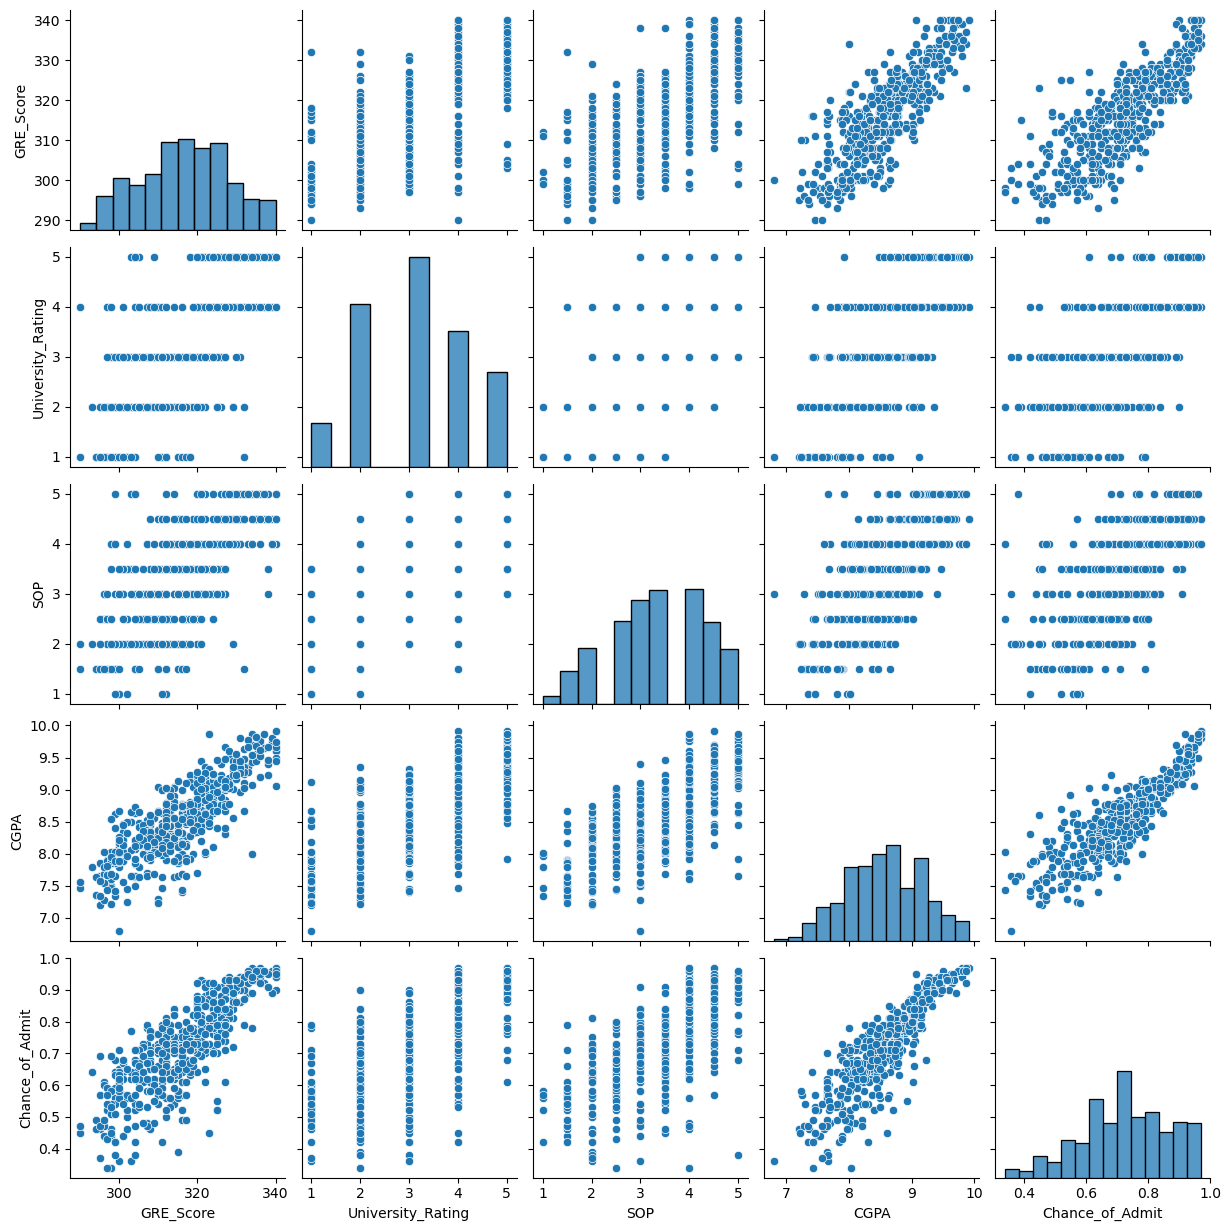

In [75]:
new = grad.drop(['LOR', 'Research', 'TOEFL_Score'], axis = 1)
sns.pairplot(new)
plt.show()

In [76]:
new.corr()

,GRE_Score,University_Rating,SOP,CGPA,Chance_of_Admit
GRE_Score,1.000000,0.635376,0.613498,0.825878,0.810351
University_Rating,0.635376,1.000000,0.728024,0.705254,0.690132
SOP,0.613498,0.728024,1.000000,0.712154,0.684137
CGPA,0.825878,0.705254,0.712154,1.000000,0.882413
Chance_of_Admit,0.810351,0.690132,0.684137,0.882413,1.000000


As seen in the correlation matrix and the scatterplots, there is still multicollinearity present as noticed by the strong linear association between `CGPA` and `GRE_Score`, and more pairs of variables seen in the matrix. Because of this multicollinearity, the interpretations of the slope will not be trustworthy, and might not accurately represent the respective relationships with the response.

## 7. Conclusion

The model still performs amazingly for the test dataset, so it still checks our primary research goal. Keeping that in mind, I would still recommend the final model to be used. While the student might not be able to accurately interpret the slopes, he would still be able to predict his admission chances. 

The final model in this study is not neceessarily the best model out of all available models. This is because there could have been quadratic terms added, more interaction terms added that have not been tested for, and many otheer factors. This might reveal a model that has a better test $R^2$ value. We could try including more interaction terms, and we could also try using regularization and then cross-validation to reach a more complete analysis.

Based on this analysis, one idea for future work might be to generalise this for all students and not just Indian students. This might require collection of more data, and transformation of the `CGPA` variable to a 4.0 scale.